# **Energy Consumption and Efficiency Analysis**
# PRN:
# 123B1B196
# 123B1B200
# 123B1B212
# 124B2B022

# PART 1 : PREPROCESSING

---


# PART 2 : REGRESSION

---


# PART 3 : CLASSIFICATION

---


# PART 4 : CLUSTERING

---



In [847]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

plt.style.use("default")
sns.set_palette("husl")

print("="*70)
print("ENERGY CONSUMPTION AND EFFICIENCY ANALYSIS PROJECT")
print("="*70)


ENERGY CONSUMPTION AND EFFICIENCY ANALYSIS PROJECT


In [ ]:
import pandas as pd

df = pd.read_csv("Household energy unit data.csv") 
print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (1000, 9)
   num_rooms  num_people  housearea  is_ac  is_tv  is_flat  num_children  \
0          3           3     742.57      1      1        1             2   
1          1           5     952.99      0      1        0             1   
2          3           1     761.44      1      1        1             0   
3          0           5     861.32      1      1        0             0   
4          1           8     731.61      0      1        0             2   

   is_urban       units  
0         0  134.731117  
1         1  125.315527  
2         0  123.047874  
3         0   80.046162  
4         1  128.429094  


In [849]:
# ============================================================
# STEP 2: FEATURE ENGINEERING
# ============================================================
print("\nSTEP 2: FEATURE ENGINEERING")
print("-"*50)

# 1. Total Energy Consumption
#    Why? This column represents the total energy consumed by each household in kWh.
#    Useful for direct regression (predicting energy usage) and for cost calculation if tariff is given.
df["Total_Energy_kWh"] = df["units"]


STEP 2: FEATURE ENGINEERING
--------------------------------------------------


In [850]:
# 2. Energy Consumption per Person
#    Why? Normalizes total consumption by household size.
#    Helps identify efficiency on a per-person basis and is great for classification (efficient vs inefficient).
df["Energy_per_Person"] = df["units"] / df["num_people"].replace(0, 1)


In [851]:
# 3. Energy Intensity (kWh per square meter)
#    Why? Normalizes energy use by house area.
#    Useful for clustering and comparing large vs small houses fairly.
df["Energy_per_SqM"] = df["units"] / df["housearea"]

In [852]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   num_rooms  num_people  housearea  is_ac  is_tv  is_flat  num_children  \
0          3           3     742.57      1      1        1             2   
1          1           5     952.99      0      1        0             1   
2          3           1     761.44      1      1        1             0   
3          0           5     861.32      1      1        0             0   
4          1           8     731.61      0      1        0             2   

   is_urban       units  Total_Energy_kWh  Energy_per_Person  Energy_per_SqM  
0         0  134.731117        134.731117          44.910372        0.181439  
1         1  125.315527        125.315527          25.063105        0.131497  
2         0  123.047874        123.047874         123.047874        0.161599  
3         0   80.046162         80.046162          16.009232        0.092934  
4         1  128.429094        128.429094          16.053637        0.175543  


In [853]:
df.shape

(1000, 12)

In [854]:
count_greater_than_100 = df[df["Energy_per_Person"] < 35].shape[0]
print("Count of values greater than 100:", count_greater_than_100)


Count of values greater than 100: 750


In [855]:
duplicates = df[df.duplicated()]
print("Duplicate rows:\n", duplicates)


Duplicate rows:
 Empty DataFrame
Columns: [num_rooms, num_people, housearea, is_ac, is_tv, is_flat, num_children, is_urban, units, Total_Energy_kWh, Energy_per_Person, Energy_per_SqM]
Index: []


In [856]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   num_rooms          1000 non-null   int64  
 1   num_people         1000 non-null   int64  
 2   housearea          1000 non-null   float64
 3   is_ac              1000 non-null   int64  
 4   is_tv              1000 non-null   int64  
 5   is_flat            1000 non-null   int64  
 6   num_children       1000 non-null   int64  
 7   is_urban           1000 non-null   int64  
 8   units              1000 non-null   float64
 9   Total_Energy_kWh   1000 non-null   float64
 10  Energy_per_Person  1000 non-null   float64
 11  Energy_per_SqM     1000 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 93.9 KB
None


In [857]:
print("\nBasic Statistics:")
print(df.describe())



Basic Statistics:
         num_rooms   num_people    housearea        is_ac        is_tv  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      1.962000     4.897000   794.703420     0.376000     0.798000   
std       1.030348     2.007591   147.771736     0.484622     0.401693   
min      -1.000000    -1.000000   244.400000     0.000000     0.000000   
25%       1.000000     4.000000   691.037500     0.000000     1.000000   
50%       2.000000     5.000000   789.970000     0.000000     1.000000   
75%       3.000000     6.000000   892.955000     1.000000     1.000000   
max       5.000000    11.000000  1189.120000     1.000000     1.000000   

           is_flat  num_children     is_urban        units  Total_Energy_kWh  \
count  1000.000000   1000.000000  1000.000000  1000.000000       1000.000000   
mean      0.477000      1.078000     0.608000   123.597217        123.597217   
std       0.499721      0.934232     0.488441    27.106187         27.1061

In [858]:
# ============================================================
# STEP 3: DATA VISUALIZATION (BEFORE PREPROCESSING)
# ============================================================
print("\nSTEP 3: DATA VISUALIZATION (BEFORE PREPROCESSING)")
print("-"*50)

# Separate categorical and numerical columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns



STEP 3: DATA VISUALIZATION (BEFORE PREPROCESSING)
--------------------------------------------------


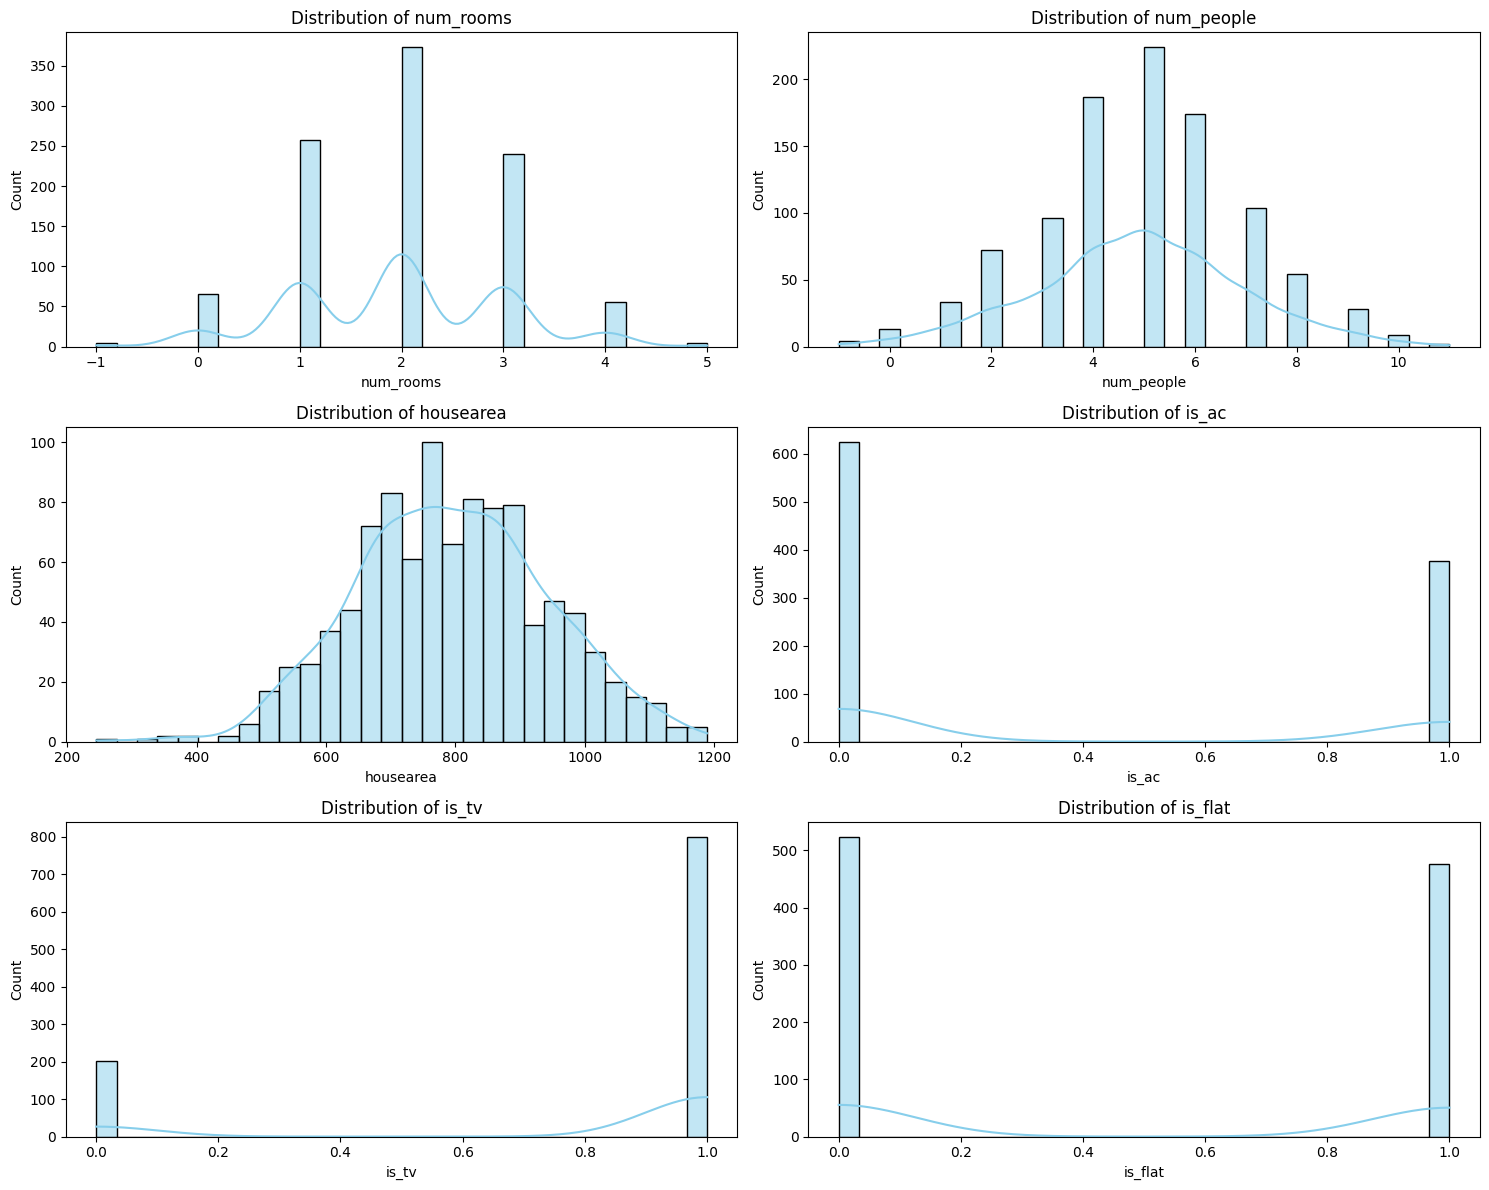

In [859]:
# --- Numerical Data Visualization ---
# 1. Histograms + KDE
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols[:6], 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

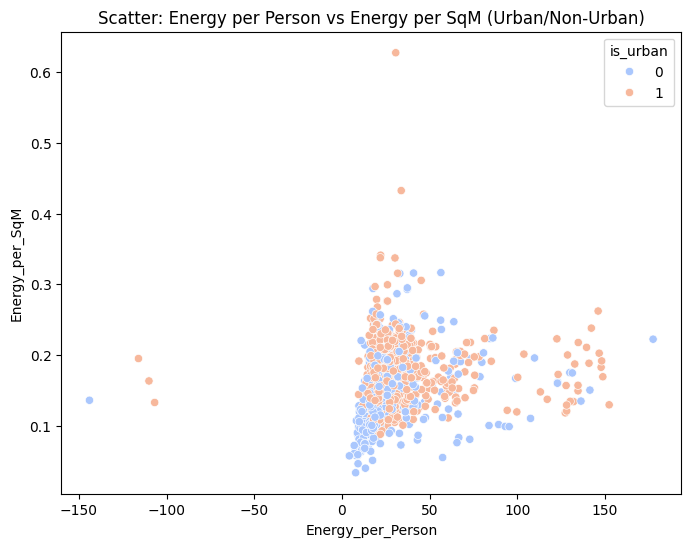

In [860]:
# 4. Scatter plots
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Energy_per_Person", y="Energy_per_SqM", data=df, hue="is_urban", palette="coolwarm")
plt.title("Scatter: Energy per Person vs Energy per SqM (Urban/Non-Urban)")
plt.show()

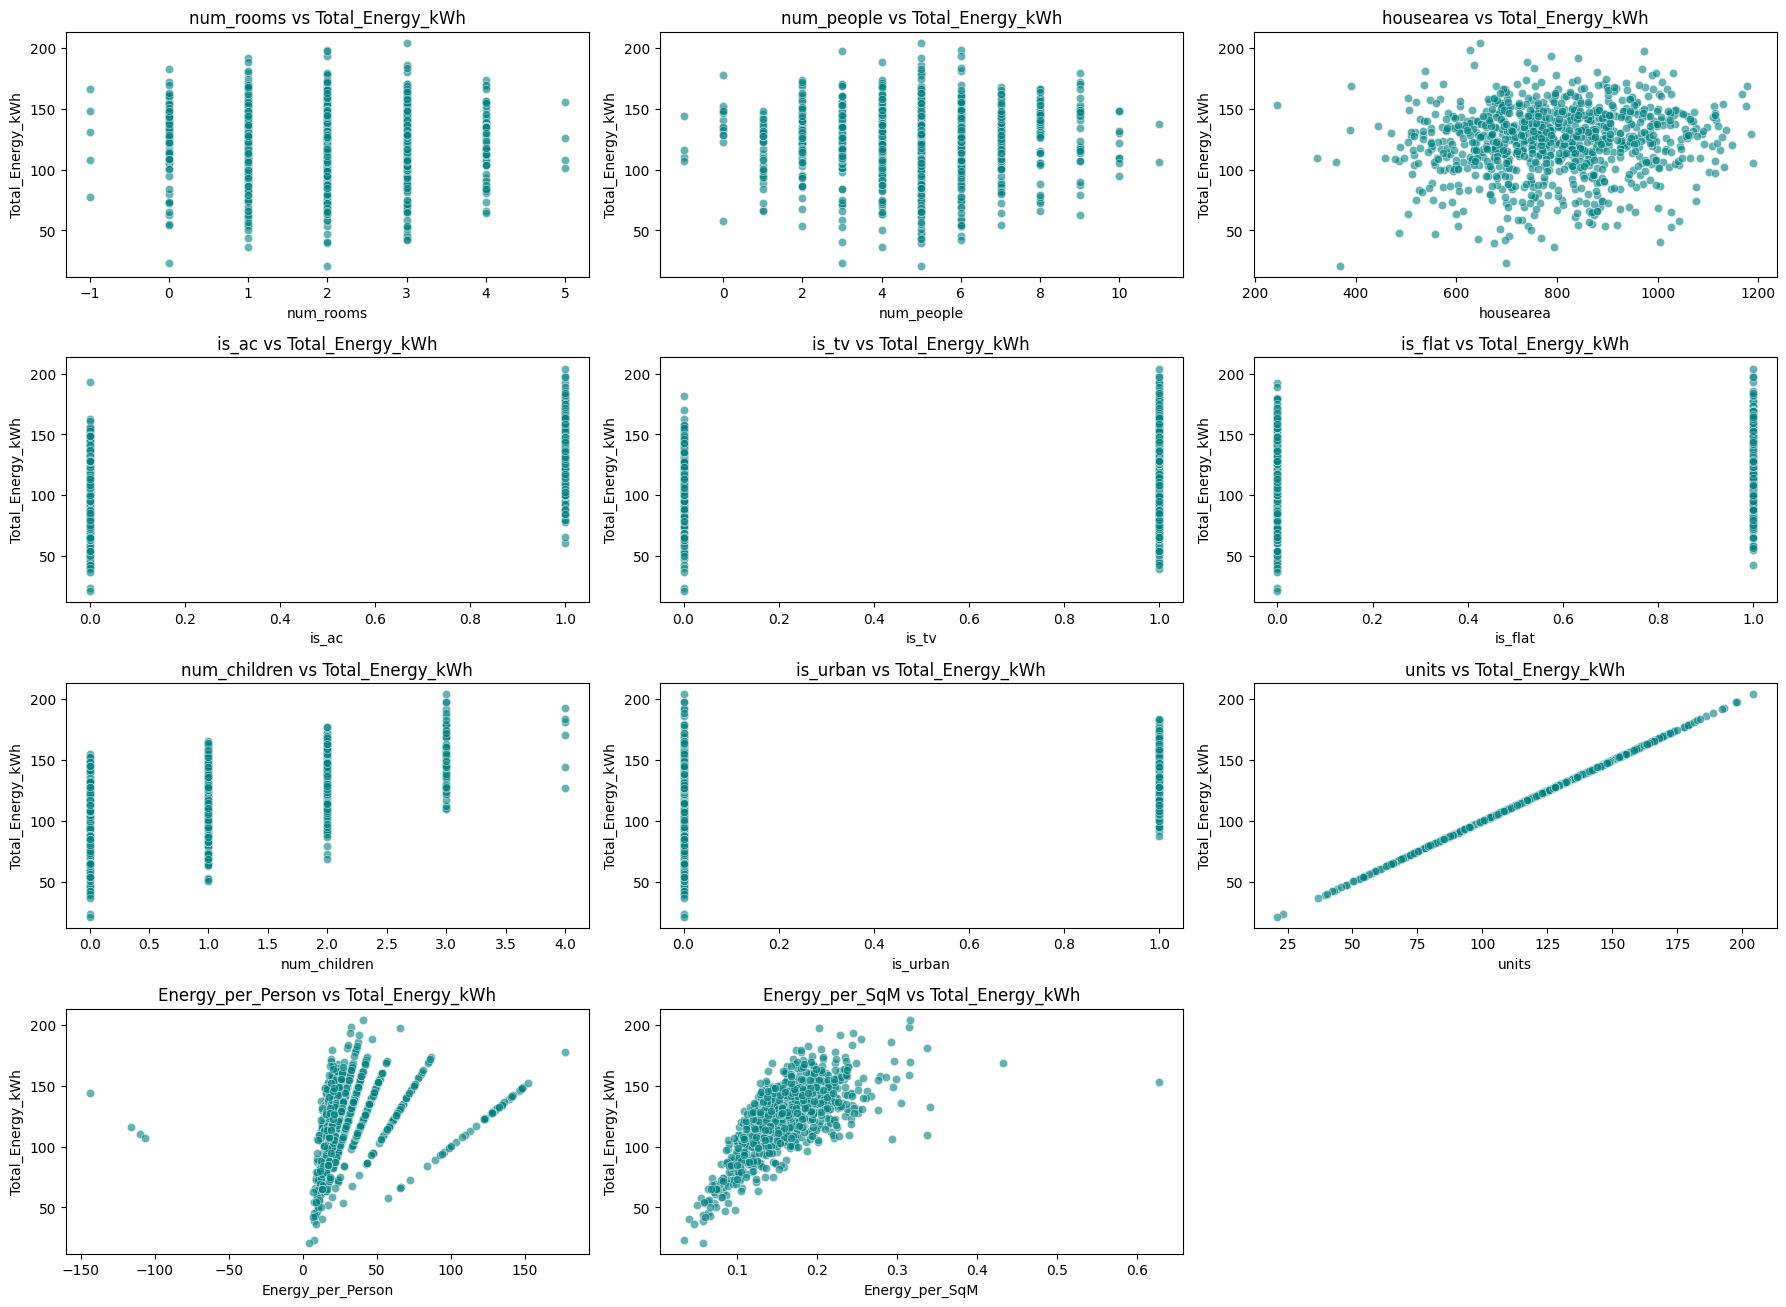

In [861]:
target = "Total_Energy_kWh"   # change if needed

plt.figure(figsize=(18, 16))
plot_idx = 1
for col in num_cols:
    if col != target:
        plt.subplot(5, 3, plot_idx)
        sns.scatterplot(x=df[col], y=df[target], alpha=0.6, color="teal")
        plt.title(f"{col} vs {target}")
        plot_idx += 1
plt.tight_layout()
plt.show()


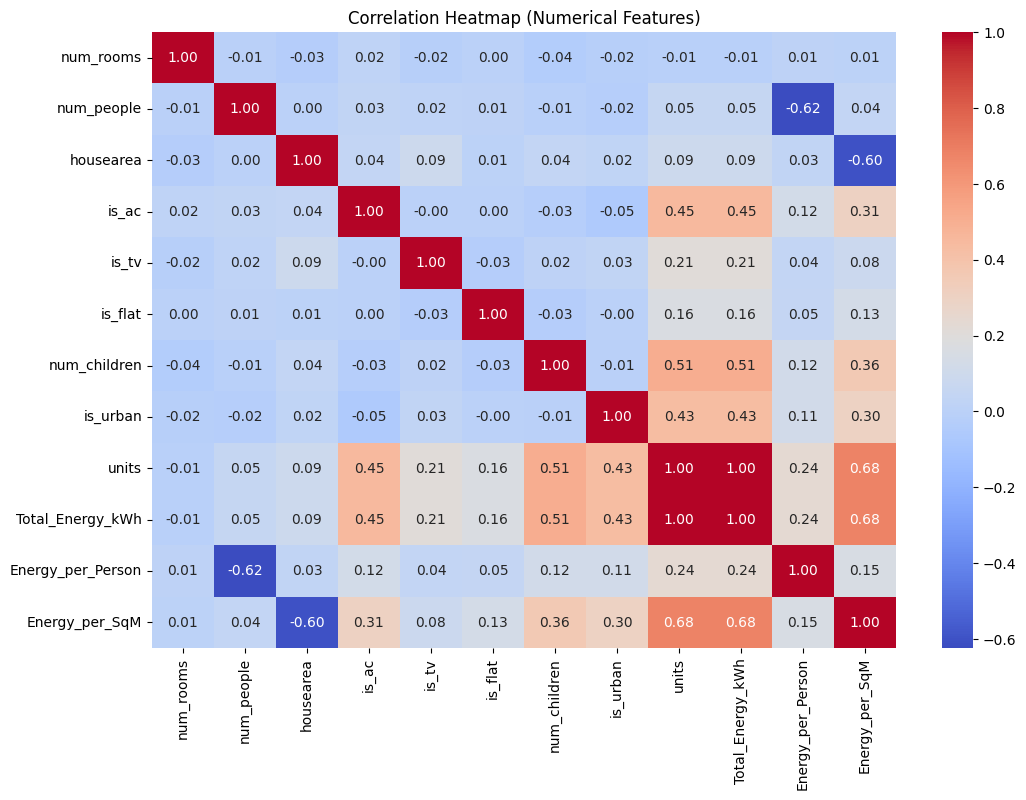

In [862]:
# 5. Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [863]:
# --- Categorical Data Visualization ---
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette="muted")
    plt.title(f"Count plot of {col}")
    plt.show()

    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
    plt.title(f"Pie Chart of {col}")
    plt.ylabel("")
    plt.show()

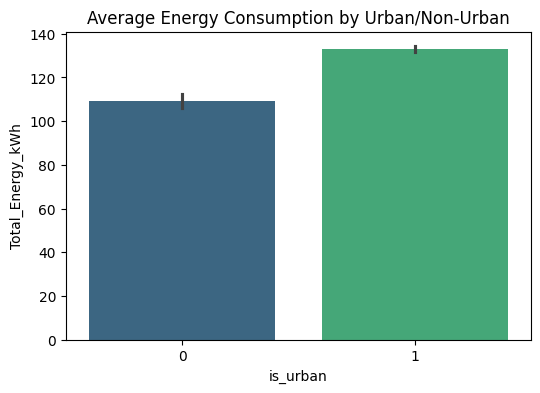

In [864]:
# Grouped bar: Average energy consumption by urban/rural
plt.figure(figsize=(6, 4))
sns.barplot(x="is_urban", y="Total_Energy_kWh", data=df, estimator=np.mean, palette="viridis")
plt.title("Average Energy Consumption by Urban/Non-Urban")
plt.show()

In [865]:
print("\n STEP 2: DATA PREPROCESSING")
print("-" * 40)


 STEP 2: DATA PREPROCESSING
----------------------------------------


In [866]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())




Missing values per column:
num_rooms            0
num_people           0
housearea            0
is_ac                0
is_tv                0
is_flat              0
num_children         0
is_urban             0
units                0
Total_Energy_kWh     0
Energy_per_Person    0
Energy_per_SqM       0
dtype: int64


In [867]:
# Handle missing values (if any)
for col in df.columns:
    if df[col].dtype in ["float64", "int64"]:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("Data preprocessing completed!")

Data preprocessing completed!


In [868]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nShape before handling outliers:", df.shape)


Shape before handling outliers: (1000, 12)



STEP 5: VISUALIZATION BEFORE OUTLIER REMOVAL
--------------------------------------------------


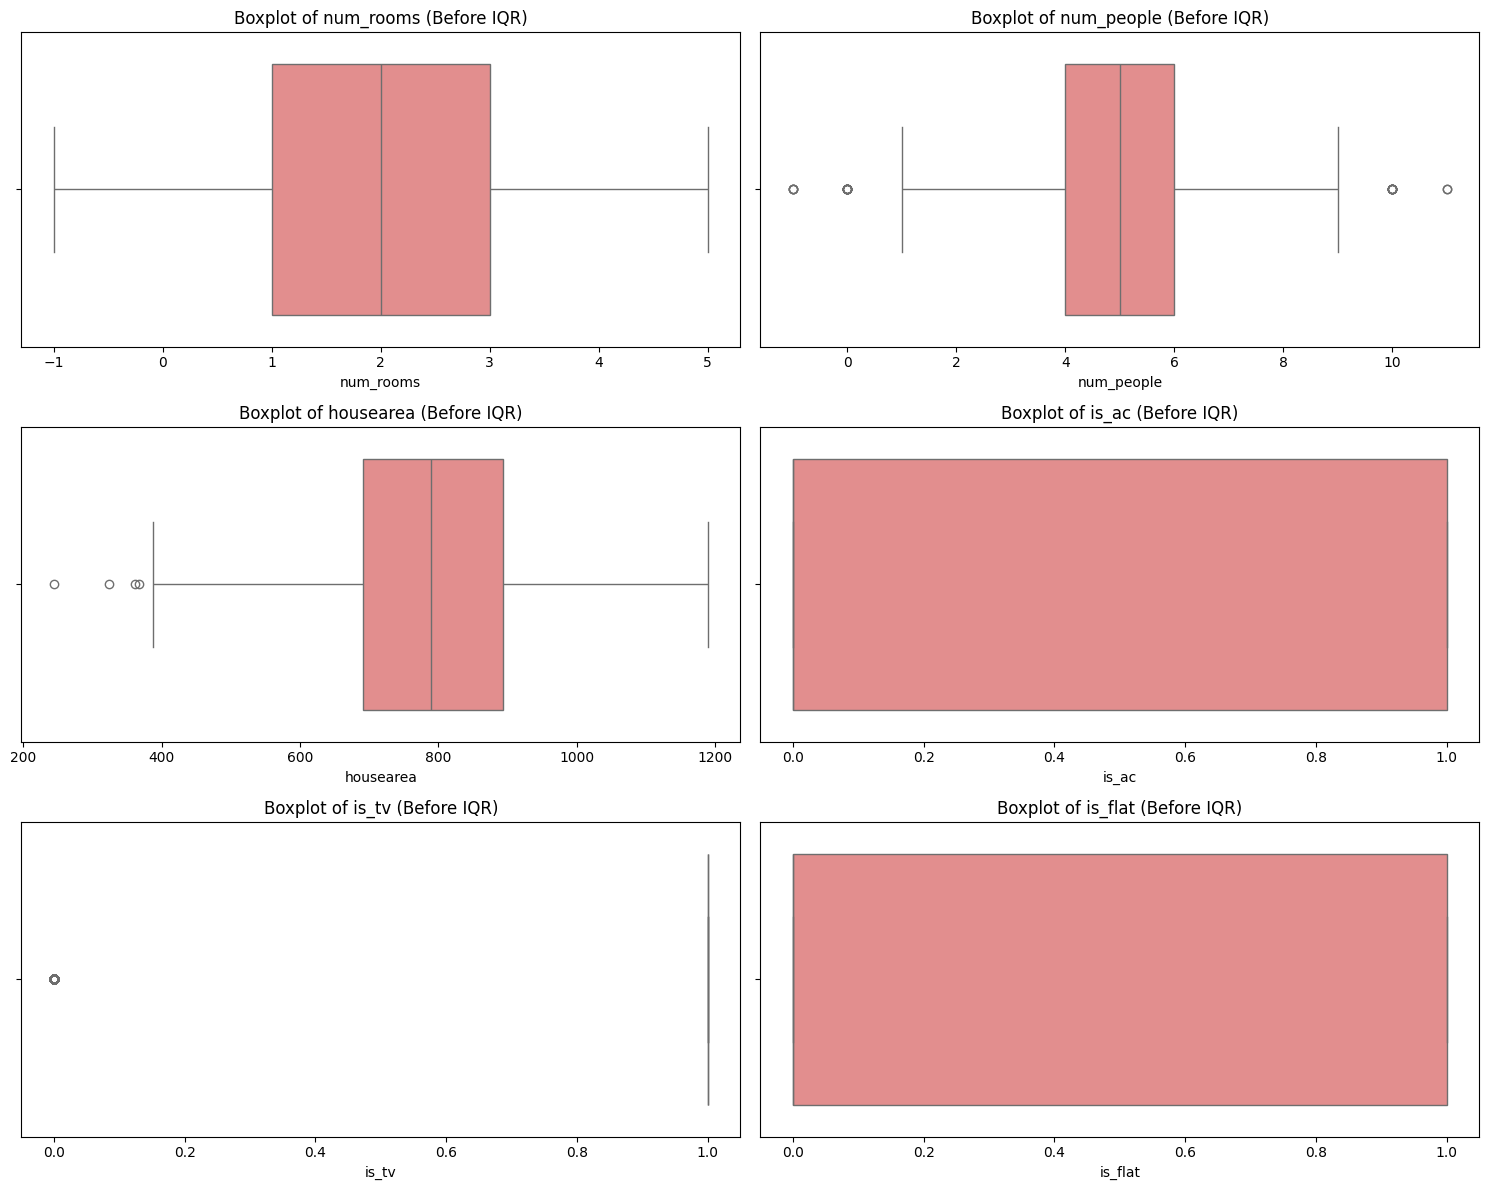

In [869]:
print("\nSTEP 5: VISUALIZATION BEFORE OUTLIER REMOVAL")
print("-"*50)

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols[:6], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col], color="lightcoral")
    plt.title(f"Boxplot of {col} (Before IQR)")
plt.tight_layout()
plt.show()

In [870]:
# ============================================================
# STEP 6: OUTLIER REMOVAL (IQR METHOD)
# ============================================================
print("\nSTEP 6: OUTLIER REMOVAL USING IQR")
print("-"*50)

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Shape before outlier removal:", df.shape)
print("Shape after outlier removal:", df_clean.shape)


STEP 6: OUTLIER REMOVAL USING IQR
--------------------------------------------------
Shape before outlier removal: (1000, 12)
Shape after outlier removal: (685, 12)



STEP 7: VISUALIZATION AFTER OUTLIER REMOVAL
--------------------------------------------------


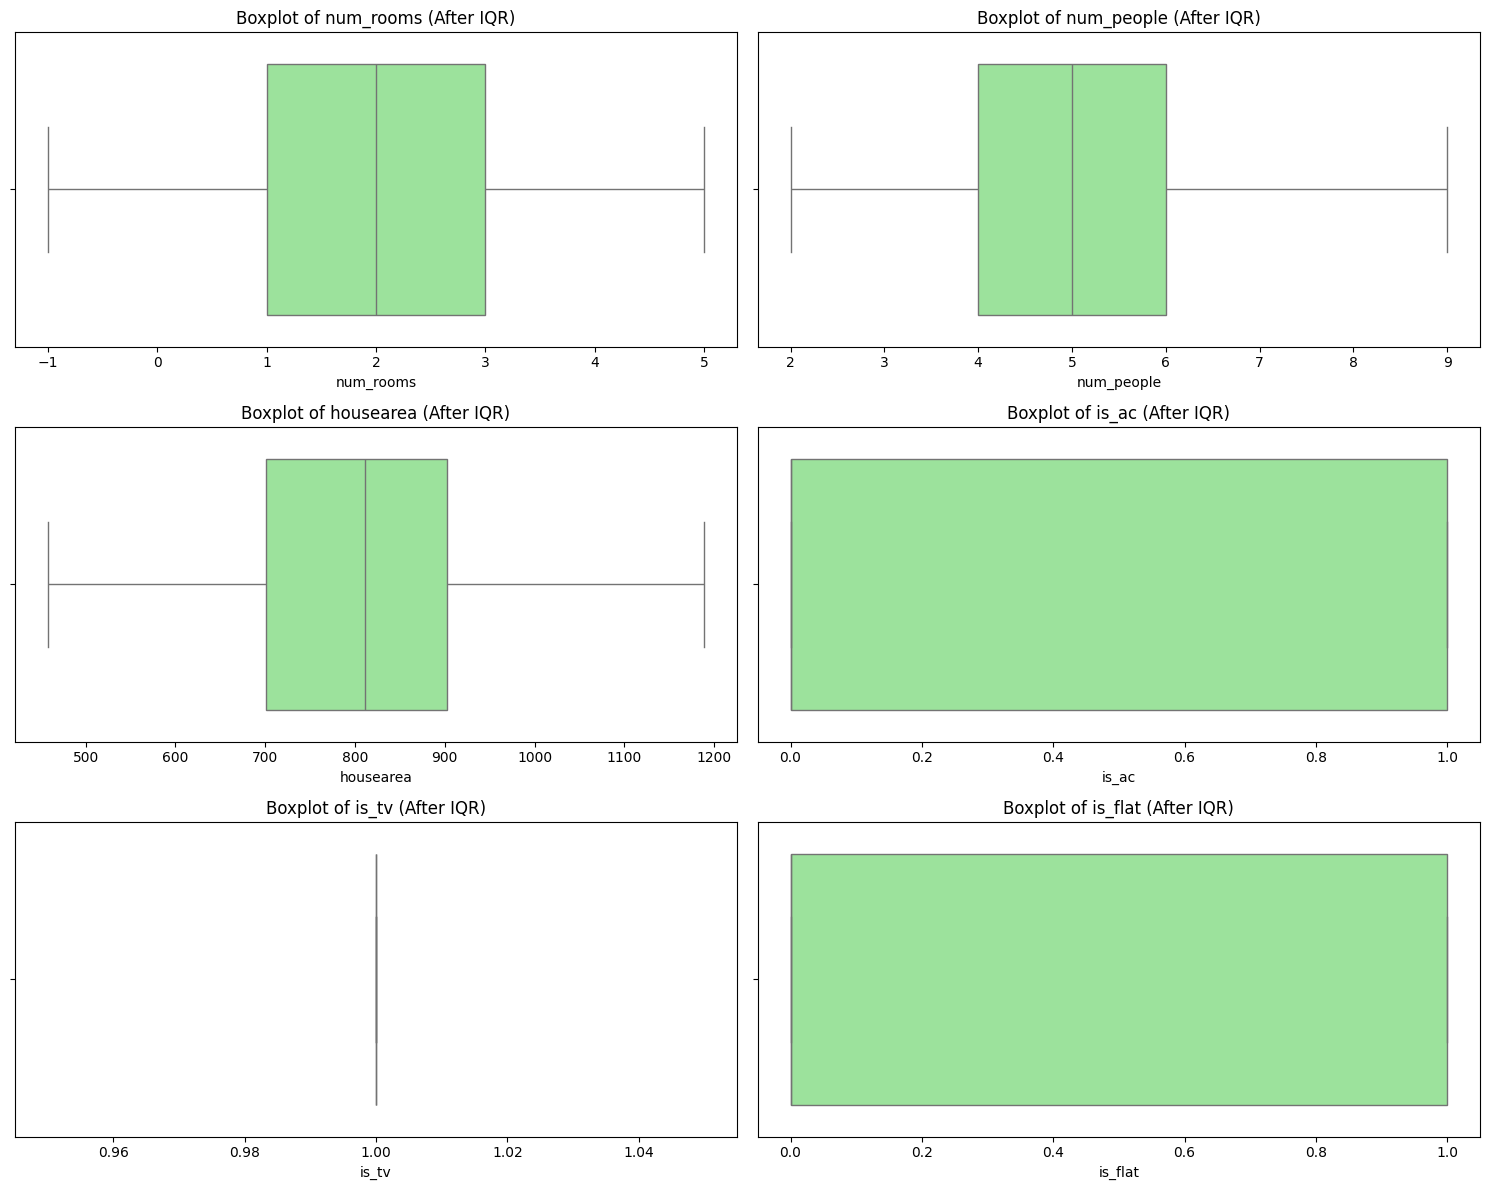

In [871]:
# ============================================================
# STEP 7: VISUALIZATION AFTER OUTLIER REMOVAL
# ============================================================
print("\nSTEP 7: VISUALIZATION AFTER OUTLIER REMOVAL")
print("-"*50)

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols[:6], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df_clean[col], color="lightgreen")
    plt.title(f"Boxplot of {col} (After IQR)")
plt.tight_layout()
plt.show()

In [872]:
# ============================================================
# PART 2: REGRESSION - Linear Regression Model
# ============================================================

In [873]:

from sklearn.feature_selection import SelectKBest, f_regression

y = df_clean['units'].copy()

# 1) Defensive: drop any columns that were derived from the target (leakage)
leakage_candidates = ['Total_Energy_kWh', 'Energy_per_Person', 'Energy_per_SqM']
cols_to_drop = [c for c in leakage_candidates if c in df_clean.columns]
print("Dropping leakage columns (if present):", cols_to_drop)

X_raw = df_clean.drop(columns=['units'] + cols_to_drop, errors='ignore').copy()
# 2) One-hot encode categorical vars (necessary for SelectKBest)
X_encoded = pd.get_dummies(X_raw, drop_first=True)


print("Final number of features used for selection:", X_encoded.shape[1])


Dropping leakage columns (if present): ['Total_Energy_kWh', 'Energy_per_Person', 'Energy_per_SqM']
Final number of features used for selection: 8


In [874]:
y.describe()

count    685.000000
mean     126.125592
std       23.918529
min       60.320028
25%      112.969864
50%      127.852426
75%      143.505600
max      188.857243
Name: units, dtype: float64

In [875]:
# 4) SelectKBest (rank all numeric features)
kbest = SelectKBest(score_func=f_regression, k='all')
kbest.fit(X_encoded.fillna(0), y.fillna(0))

feature_scores = pd.DataFrame({
    'Feature': X_encoded.columns,
    'F-Score': kbest.scores_
}).sort_values(by='F-Score', ascending=False)

print("\nTop features by F-Score:\n", feature_scores.head(10))

# Choose top 5 (or choose a different k)
selected_features_kbest = feature_scores.head(5)['Feature'].tolist()
print("\nSelected features (top 5):", selected_features_kbest)

X_selected = X_encoded[selected_features_kbest]



Top features by F-Score:
         Feature     F-Score
6  num_children  208.863404
7      is_urban  192.172282
3         is_ac  173.097043
2     housearea   13.252839
5       is_flat   10.755704
1    num_people    8.327378
0     num_rooms    0.734963
4         is_tv    0.000000

Selected features (top 5): ['num_children', 'is_urban', 'is_ac', 'housearea', 'is_flat']


In [876]:
# 5) Train/test split, scale, fit
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, shuffle=True)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_s, y_train)
y_pred = lr.predict(X_test_s)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nLinear Regression Results : MSE = {mse:.6f}, R² = {r2:.6f}")



Linear Regression Results : MSE = 145.171697, R² = 0.735907


In [877]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_s, y_train)
y_pred_ridge = ridge.predict(X_test_s)

print("Ridge Regression (scaled data):")
print("R² Score:", r2_score(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("-"*50)



Ridge Regression (scaled data):
R² Score: 0.7360142197560733
MSE: 145.11256171124953
--------------------------------------------------


In [878]:
from sklearn.linear_model import Lasso

# Lasso Regression on scaled data
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_s, y_train)
y_pred_lasso = lasso.predict(X_test_s)

print("Lasso Regression (scaled data):")
print("R² Score:", r2_score(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("-"*50)



Lasso Regression (scaled data):
R² Score: 0.7364254055229184
MSE: 144.88653355203977
--------------------------------------------------


In [879]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Apply polynomial to SCALED features (like you did for linear)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_s)  # Use scaled!
X_test_poly = poly.transform(X_test_s)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

print("Polynomial Regression (on scaled features):")
print("R² Score:", r2_score(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))


Polynomial Regression (on scaled features):
R² Score: 0.7499251867520378
MSE: 137.46572537483857


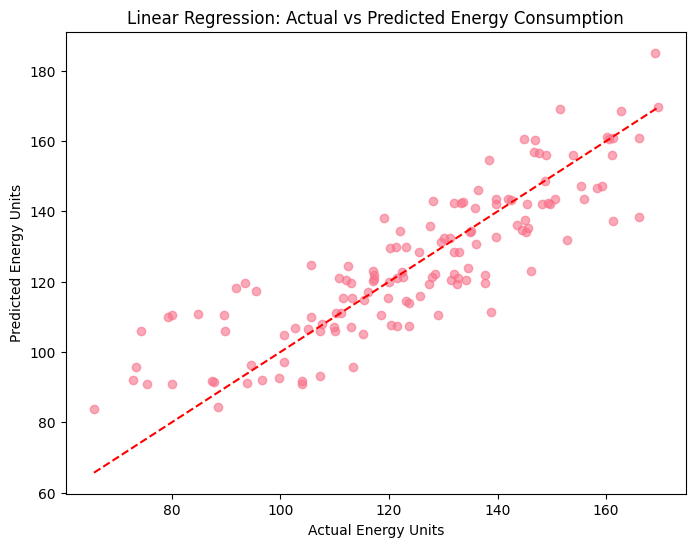

In [880]:
# --- 7. Plot predictions vs actual ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Energy Units')
plt.ylabel('Predicted Energy Units')
plt.title('Linear Regression: Actual vs Predicted Energy Consumption')
plt.show()


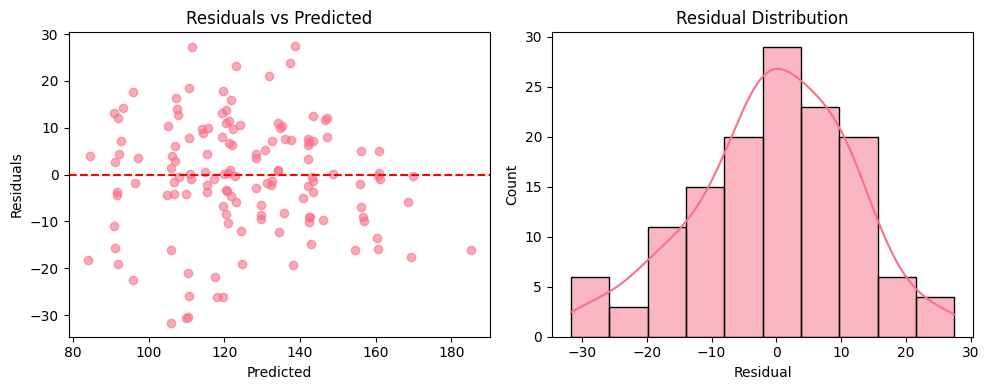

MAE: 9.38815123358042
RMSE: 12.048721814072021


In [881]:
# --- 8. Residual analysis ---
residuals = y_test - y_pred
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

plt.subplot(1,2,2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residual')
plt.title('Residual Distribution')
plt.tight_layout()
plt.show()

print("MAE:", np.mean(np.abs(residuals)))
print("RMSE:", np.sqrt(np.mean(residuals**2)))

In [882]:
# --- 9. Model coefficients ---
coefficients = pd.DataFrame({
    'Feature': selected_features_kbest,
    'Coefficient': lr.coef_
})
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
        Feature  Coefficient
0  num_children    12.476505
1      is_urban    11.377688
2         is_ac    12.898193
3     housearea     0.838418
4       is_flat     4.132812


In [883]:
from sklearn.ensemble import RandomForestRegressor

# # Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Regression:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("-"*50)


Random Forest Regression:
R² Score: 0.6339767363605903
MSE: 201.20240333986234
--------------------------------------------------



PART 4: CLUSTERING (example)
--------------------------------------------------


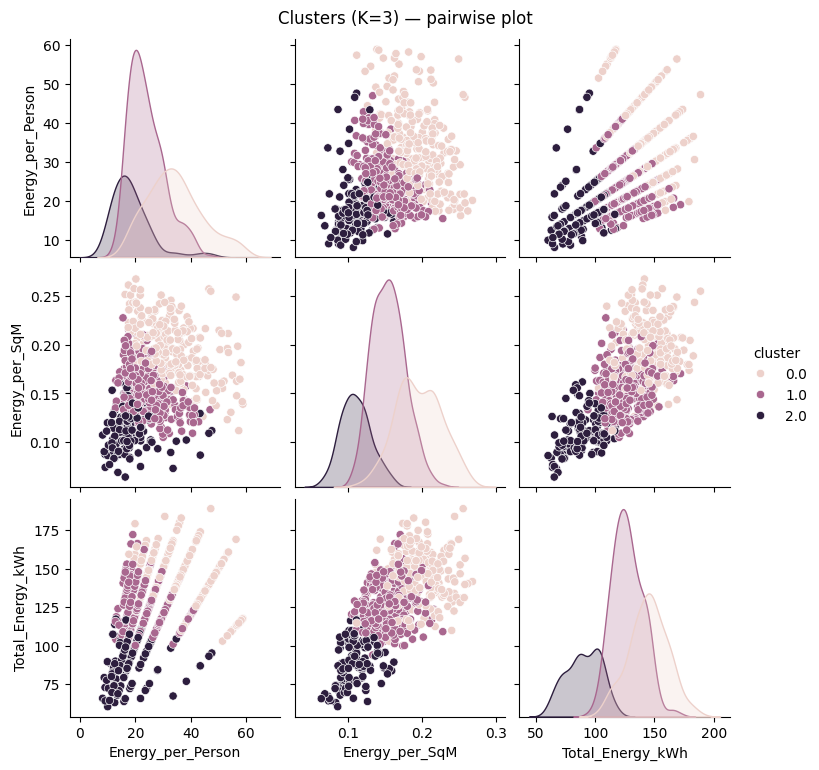

Cluster sizes:
 cluster
1.0    323
0.0    233
2.0    129
Name: count, dtype: int64

Script completed.



In [884]:
# ============================================================
# PART 4: CLUSTERING (example using KMeans)
# ============================================================
print("\nPART 4: CLUSTERING (example)")
print("-"*50)

# Use a few numeric features for clustering
cluster_cols = [c for c in ['Energy_per_Person', 'Energy_per_SqM', 'Total_Energy_kWh'] if c in df_clean.columns]
if cluster_cols:
	X_cluster = df_clean[cluster_cols].dropna()
	scaler_clust = StandardScaler()
	X_cluster_s = scaler_clust.fit_transform(X_cluster)

	kmeans = KMeans(n_clusters=3, random_state=42)
	labels = kmeans.fit_predict(X_cluster_s)

	df_clean['cluster'] = np.nan
	df_clean.loc[X_cluster.index, 'cluster'] = labels

	sns.pairplot(df_clean.loc[X_cluster.index, cluster_cols + ['cluster']], hue='cluster', diag_kind='kde')
	plt.suptitle('Clusters (K=3) — pairwise plot', y=1.02)
	plt.show()

	print("Cluster sizes:\n", df_clean['cluster'].value_counts())
else:
	print("Not enough columns for clustering — add features and retry.")

print('\nScript completed.\n')

In [885]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import numpy as np

# --- Data Preparation (Re-creation of Binary Target) ---
try:
    df = pd.read_csv("Household energy unit data.csv")
    df["Total_Energy_kWh"] = df["units"]
    df["Energy_per_Person"] = df["units"] / df["num_people"].replace(0, 1)
    df["Energy_per_SqM"] = df["units"] / df["housearea"]

    # --- Step 1: Create the Binary Target Variable ---
    median_intensity = df['Energy_per_SqM'].median()
    df['Efficiency_Class_Binary'] = (df['Energy_per_SqM'] > median_intensity).astype(int)

    # --- Step 2: Prepare Data and Split ---
    X = df.drop(columns=[
        'units',
        'Total_Energy_kWh',
        'Energy_per_Person',
        'Energy_per_SqM',
        'Efficiency_Class_Binary'
    ])
    y = df['Efficiency_Class_Binary']

    # Handle negative/zero values in num_rooms/num_people
    median_rooms = X['num_rooms'].median()
    X['num_rooms'] = X['num_rooms'].replace(-1, median_rooms)
    X['num_people'] = X['num_people'].replace(-1, X['num_people'].median())

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    # Scale numerical features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_scaled = scaler.fit_transform(X) # Full dataset for CV

except Exception as e:
    print(f"Error during data preparation: {e}")

# --- Step 3: Define Classifiers for Comparison ---
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine (SVC)": SVC(random_state=42, probability=True),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
}

# --- Step 4: Perform Stratified Cross-Validation ---
results = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring_metric = 'f1'

print("\nRunning 5-Fold Stratified Cross-Validation (Scoring: F1-Score)...")

for name, model in classifiers.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring=scoring_metric)
    results[name] = {
        "Mean F1-Score": np.mean(cv_scores),
        "Std Dev F1-Score": np.std(cv_scores)
    }

# --- Step 5: Summarize and Identify Best Model ---
comparison_df = pd.DataFrame(results).T.sort_values(by="Mean F1-Score", ascending=False)

print("\n--- Classifier Comparison Results (F1-Score) ---")
print(comparison_df.round(4))
print("-" * 50)

best_model_name = comparison_df.index[0]
print(f"\nThe best performing model based on Mean F1-Score is: {best_model_name}")

# --- Step 6: Train the Best Model ---
final_model = classifiers[best_model_name]
final_model.fit(X_train_scaled, y_train)

# --- Step 7: Final Evaluation of the Best Model ---
from sklearn.metrics import classification_report

y_pred_best = final_model.predict(X_test_scaled)
target_names = ['Efficient (0)', 'Not_Efficient (1)']

print(f"\n--- Final Evaluation for the BEST Model: {best_model_name} ---")
print(classification_report(y_test, y_pred_best, target_names=target_names))

# Print Feature Importance if Random Forest is best
if isinstance(final_model, RandomForestClassifier):
    feature_importances = pd.Series(final_model.feature_importances_, index=X.columns)
    print("\nTop 5 Feature Importances for the Best Model:")
    print(feature_importances.sort_values(ascending=False).head(5).round(4))



Running 5-Fold Stratified Cross-Validation (Scoring: F1-Score)...

--- Classifier Comparison Results (F1-Score) ---
                              Mean F1-Score  Std Dev F1-Score
Logistic Regression                  0.8735            0.0225
Support Vector Machine (SVC)         0.8626            0.0222
Random Forest                        0.8542            0.0192
K-Nearest Neighbors                  0.8201            0.0196
--------------------------------------------------

The best performing model based on Mean F1-Score is: Logistic Regression

--- Final Evaluation for the BEST Model: Logistic Regression ---
                   precision    recall  f1-score   support

    Efficient (0)       0.89      0.86      0.87       125
Not_Efficient (1)       0.86      0.90      0.88       125

         accuracy                           0.88       250
        macro avg       0.88      0.88      0.88       250
     weighted avg       0.88      0.88      0.88       250



In [886]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree

threshold = 35

# Create target label
df["Efficient"] = (df["Energy_per_Person"] <= threshold).astype(int)
# 1 = Efficient, 0 = Not Efficient

# Features for classification
X = df[["num_rooms", "num_people", "housearea", "is_ac", "is_tv",
        "is_flat", "num_children", "is_urban",
        "Energy_per_SqM", "Total_Energy_kWh"]]

y = df["Efficient"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        66
           1       0.99      0.96      0.97       234

    accuracy                           0.96       300
   macro avg       0.93      0.96      0.94       300
weighted avg       0.96      0.96      0.96       300



In [887]:
# Split the data - 80% train, 20% test, stratify to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)
# Standard scaling fitted only on train data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Decision Tree - Accuracy: {accuracy_dt}")
print(f"Decision Tree - F1 Score: {f1_dt}")
print(f"Decision Tree - ROC AUC: {roc_auc_dt}")
print(f"Decision Tree - Confusion Matrix:\n{conf_matrix_dt}")


Decision Tree - Accuracy: 0.99
Decision Tree - F1 Score: 0.9933333333333333
Decision Tree - ROC AUC: 0.9866666666666666
Decision Tree - Confusion Matrix:
[[ 49   1]
 [  1 149]]


In [888]:
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"\nKNN - Accuracy: {accuracy_knn}")
print(f"KNN - F1 Score: {f1_knn}")
print(f"KNN - ROC AUC: {roc_auc_knn}")
print(f"KNN - Confusion Matrix:\n{conf_matrix_knn}")


# Support Vector Machine Classifier
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f"\nSVM - Accuracy: {accuracy_svm}")
print(f"SVM - F1 Score: {f1_svm}")
print(f"SVM - ROC AUC: {roc_auc_svm}")
print(f"SVM - Confusion Matrix:\n{conf_matrix_svm}")


KNN - Accuracy: 0.855
KNN - F1 Score: 0.9042904290429042
KNN - ROC AUC: 0.9164000000000001
KNN - Confusion Matrix:
[[ 34  16]
 [ 13 137]]

SVM - Accuracy: 0.945
SVM - F1 Score: 0.9632107023411371
SVM - ROC AUC: 0.9898666666666667
SVM - Confusion Matrix:
[[ 45   5]
 [  6 144]]


In [889]:
threshold = 35
print(f"Using threshold (median) for Energy_per_Person = {threshold:.4f}")

# Label: 0 = efficient (<= threshold), 1 = inefficient (> threshold)
df['energy_label'] = (df['Energy_per_Person'] > threshold).astype(int)

# Choose features for modeling (you can add or remove features)
# Common choices: Energy_per_Person, Energy_per_SqM, Total_Energy_kWh, housearea, num_people, plus any other numeric columns in your dataset
feature_cols = ['Energy_per_Person', 'Energy_per_SqM', 'Total_Energy_kWh', 'housearea', 'num_people']
X = df[feature_cols]
y = df['energy_label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Preprocessing done. Shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Using threshold (median) for Energy_per_Person = 35.0000
Preprocessing done. Shapes: (800, 5) (200, 5) (800,) (200,)


Decision Tree results
---------------------
Accuracy: 0.9950
F1 Score: 0.9901
ROC AUC: 0.9967

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       150
           1       0.98      1.00      0.99        50

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

Confusion Matrix:
 [[149   1]
 [  0  50]]


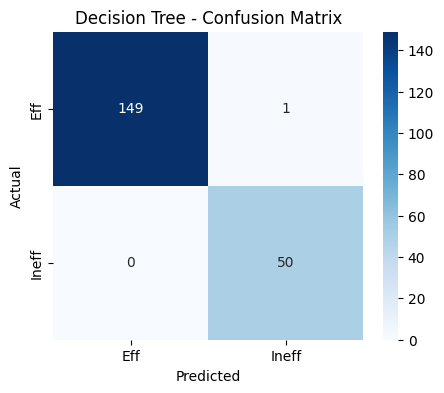

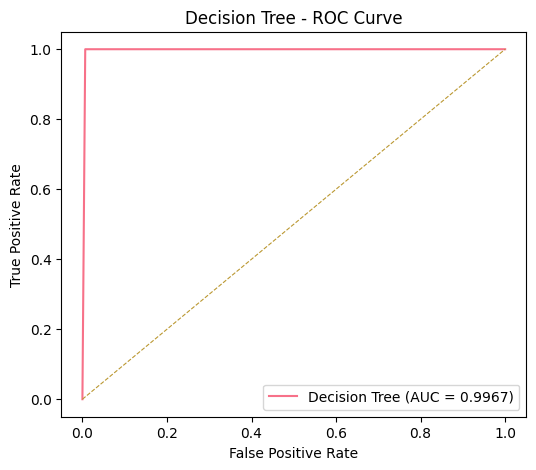

In [890]:
# Decision Tree classifier: accuracy, F1, ROC/AUC, confusion matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assumes X_train, X_test, y_train, y_test exist from preprocessing block

# Train
dt = DecisionTreeClassifier(random_state=42, max_depth=None)
dt.fit(X_train, y_train)

# Predict
y_pred = dt.predict(X_test)
# Probabilities for ROC/AUC
if hasattr(dt, "predict_proba"):
    y_proba = dt.predict_proba(X_test)[:, 1]
else:
    # fallback to decision_function if available
    y_proba = dt.decision_function(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print("Decision Tree results")
print("---------------------")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Eff','Ineff'], yticklabels=['Eff','Ineff'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc_val = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc_val:.4f})')
plt.plot([0,1],[0,1],'--', linewidth=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - ROC Curve')
plt.legend(loc='lower right')
plt.show()


KNN results
-----------
Accuracy: 0.9950
F1 Score: 0.9901
ROC AUC: 0.9997

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       150
           1       0.98      1.00      0.99        50

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

Confusion Matrix:
 [[149   1]
 [  0  50]]


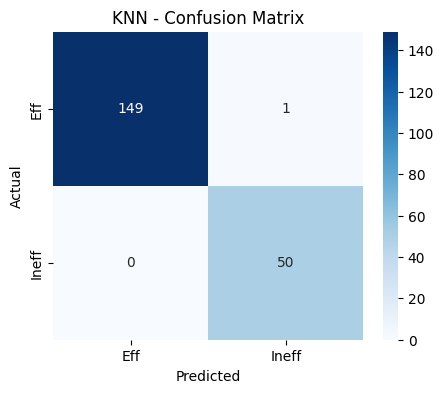

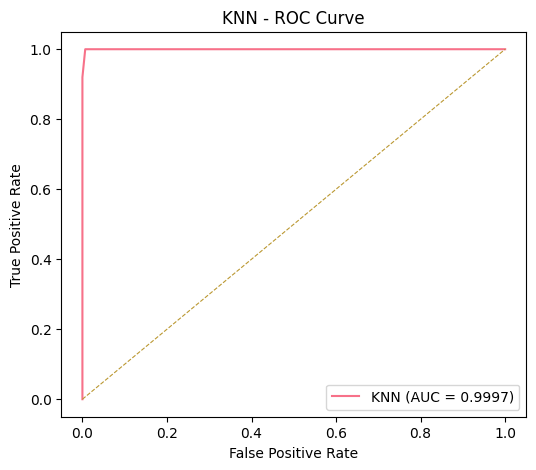

In [891]:
# KNN classifier: scaling required, with metrics and ROC/AUC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assumes X_train, X_test, y_train, y_test exist

# We will build a pipeline that scales then fits KNN
knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

# Train
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# For ROC/AUC we need probabilities. KNeighborsClassifier supports predict_proba.
if hasattr(knn.named_steps['kneighborsclassifier'], 'predict_proba'):
    y_proba = knn.predict_proba(X_test)[:, 1]  # pipeline forwards to estimator
else:
    # fallback (unlikely): use decision_function if available
    try:
        y_proba = knn.decision_function(X_test)
    except Exception:
        y_proba = y_pred  # degrade gracefully (not ideal)

# Metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# roc_auc requires probabilities or scores and both classes present
try:
    roc_auc = roc_auc_score(y_test, y_proba)
except Exception as e:
    roc_auc = np.nan
    print("ROC AUC could not be computed:", e)

cm = confusion_matrix(y_test, y_pred)

print("KNN results")
print("-----------")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}" if not np.isnan(roc_auc) else "ROC AUC: N/A")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Eff','Ineff'], yticklabels=['Eff','Ineff'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN - Confusion Matrix')
plt.show()

# ROC curve if possible
if not np.isnan(roc_auc):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc_val = auc(fpr, tpr)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc_val:.4f})')
    plt.plot([0,1],[0,1],'--', linewidth=0.8)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('KNN - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


SVM results
-----------
Accuracy: 0.9900
F1 Score: 0.9804
ROC AUC: 0.9993

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       150
           1       0.96      1.00      0.98        50

    accuracy                           0.99       200
   macro avg       0.98      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Confusion Matrix:
 [[148   2]
 [  0  50]]


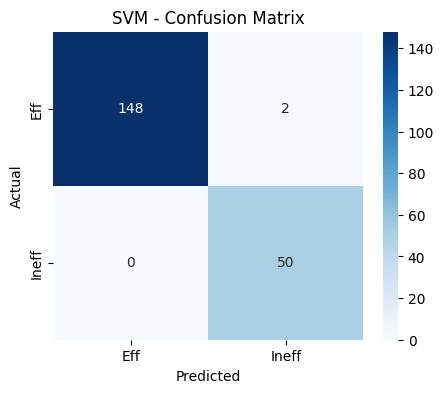

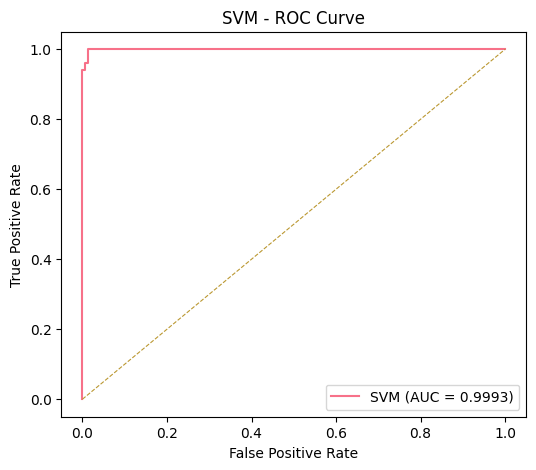

In [892]:
# SVM classifier: scaling required, set probability=True for ROC/AUC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assumes X_train, X_test, y_train, y_test exist

# Use RBF kernel SVM with probability estimates
svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, random_state=42))

# Train
svm.fit(X_train, y_train)

# Predict
y_pred = svm.predict(X_test)
# Probabilities
y_proba = svm.predict_proba(X_test)[:, 1]

# Metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print("SVM results")
print("-----------")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Eff','Ineff'], yticklabels=['Eff','Ineff'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM - Confusion Matrix')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc_val = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc_val:.4f})')
plt.plot([0,1],[0,1],'--', linewidth=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM - ROC Curve')
plt.legend(loc='lower right')
plt.show()


**CLUSTERING**

After outlier removal: (856, 3)
After synthesis: (1712, 3)

K-Means Silhouette: 0.308
Hierarchical Silhouette: 0.234
DBSCAN Silhouette (core points only): 0.365


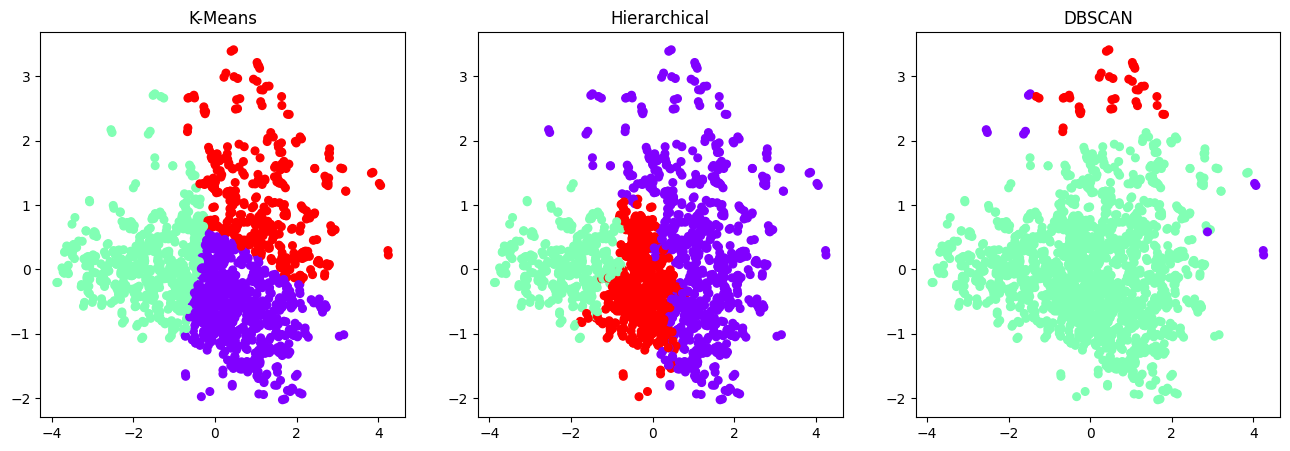


K-Means Cluster Centroids (original units):
   Energy_per_Person  Energy_per_SqM  Total_Energy_kWh
0          23.189644        0.181436        135.875605
1          20.017360        0.121290        100.018658
2          40.545359        0.171134        136.592399

Clustering Summary:
         Method  Silhouette Score
0        KMeans          0.307641
1  Hierarchical          0.233552
2        DBSCAN          0.365115


In [893]:
# ----------------------------------------------
#  HOUSEHOLD ENERGY CLUSTERING (3 METHODS + SYNTHESIS)
# ----------------------------------------------

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ LOAD DATA
df = pd.read_csv("Household energy unit data.csv")  # <-- uncomment for your dataset

# Example: ensure numeric columns
# df['units'] = pd.to_numeric(df['units'], errors='coerce')
# df['num_people'] = pd.to_numeric(df['num_people'], errors='coerce')
# df['housearea'] = pd.to_numeric(df['housearea'], errors='coerce')
# df.dropna(subset=['units','num_people','housearea'], inplace=True)

# 2️⃣ FEATURE ENGINEERING
df['Total_Energy_kWh'] = df['units']
df['Energy_per_Person'] = df['units'] / df['num_people']
df['Energy_per_SqM'] = df['units'] / df['housearea']

cluster_cols = ['Energy_per_Person', 'Energy_per_SqM', 'Total_Energy_kWh']
X = df[cluster_cols].copy()

# 3️⃣ REMOVE OUTLIERS (IQR METHOD)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
mask = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
X = X[mask]
print("After outlier removal:", X.shape)

# 4️⃣ SCALE FEATURES
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5️⃣ SYNTHESIZE FUNCTION (AUGMENTATION)
def synthesize_data(X_scaled, noise_factor=0.05, copies=1):
    """Add Gaussian noise-based synthetic samples."""
    synth_data = [X_scaled]
    for _ in range(copies):
        noise = np.random.normal(0, noise_factor, X_scaled.shape)
        synth_data.append(X_scaled + noise)
    X_synth = np.vstack(synth_data)
    return X_synth

# Create synthetic dataset (2x size)
X_augmented = synthesize_data(X_scaled, noise_factor=0.05, copies=1)
print("After synthesis:", X_augmented.shape)

# 6️⃣ CLUSTERING METHODS

# ----- (A) K-MEANS -----
kmeans = KMeans(n_clusters=3, random_state=42)
labels_km = kmeans.fit_predict(X_augmented)
sil_km = silhouette_score(X_augmented, labels_km)
print(f"\nK-Means Silhouette: {sil_km:.3f}")

# ----- (B) HIERARCHICAL CLUSTERING -----
hier = AgglomerativeClustering(n_clusters=3)
labels_hc = hier.fit_predict(X_augmented)
sil_hc = silhouette_score(X_augmented, labels_hc)
print(f"Hierarchical Silhouette: {sil_hc:.3f}")

# ----- (C) DBSCAN -----
db = DBSCAN(eps=0.8, min_samples=10)
labels_db = db.fit_predict(X_augmented)
mask_core = labels_db != -1
sil_db = silhouette_score(X_augmented[mask_core], labels_db[mask_core]) if np.unique(labels_db[mask_core]).size > 1 else 0
print(f"DBSCAN Silhouette (core points only): {sil_db:.3f}")

# 7️⃣ VISUALIZE RESULTS (PCA projection for clarity)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(X_augmented)

fig, axes = plt.subplots(1, 3, figsize=(16,5))
for ax, labels, title in zip(
    axes,
    [labels_km, labels_hc, labels_db],
    ['K-Means', 'Hierarchical', 'DBSCAN']
):
    ax.scatter(proj[:,0], proj[:,1], c=labels, cmap='rainbow', s=30)
    ax.set_title(title)
plt.show()

# 8️⃣ CLUSTER CENTROIDS FOR K-MEANS
centroids_orig = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids_orig, columns=cluster_cols)
print("\nK-Means Cluster Centroids (original units):")
print(centroids_df)

# 9️⃣ SUMMARY TABLE
summary = pd.DataFrame({
    'Method': ['KMeans','Hierarchical','DBSCAN'],
    'Silhouette Score': [sil_km, sil_hc, sil_db]
})
print("\nClustering Summary:")
print(summary)



🔎 Cluster evaluation for KMeans

KMeans with 2 clusters:
Silhouette: 0.317
Davies-Bouldin: 1.219

KMeans with 3 clusters:
Silhouette: 0.274
Davies-Bouldin: 1.347

KMeans with 4 clusters:
Silhouette: 0.284
Davies-Bouldin: 1.312

KMeans with 5 clusters:
Silhouette: 0.3
Davies-Bouldin: 1.193

KMeans with 6 clusters:
Silhouette: 0.315
Davies-Bouldin: 1.263

🔹 Final KMeans Metrics:
Inertia: 927.7741731970915
Silhouette Score: 0.2741297285304693
Davies-Bouldin Index: 1.34706559692041

🔹 Hierarchical Metrics:
Silhouette Score: 0.25786888987927487
Davies-Bouldin Index: 1.463565293172539

🔹 KMeans Cluster Profiles:
                   is_ac     is_tv   is_flat  is_urban       units
KMeans_Cluster                                                    
0               0.172589  0.690355  0.451777  0.030457   82.733019
1               0.859813  0.856698  0.607477  0.719626  149.887898
2               0.136929  0.802905  0.400415  0.769710  122.790035

🔹 Hierarchical Cluster Profiles:
                

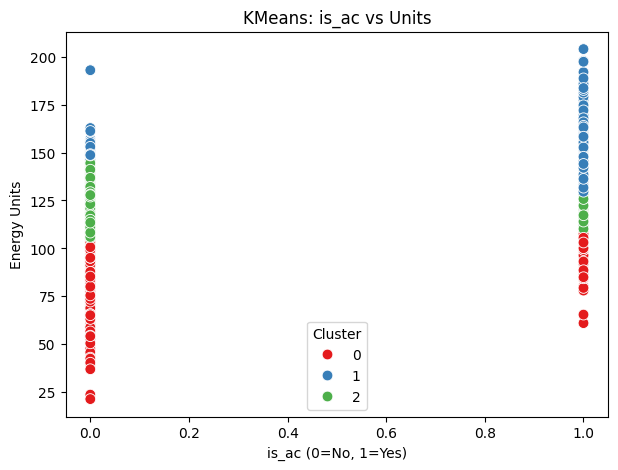

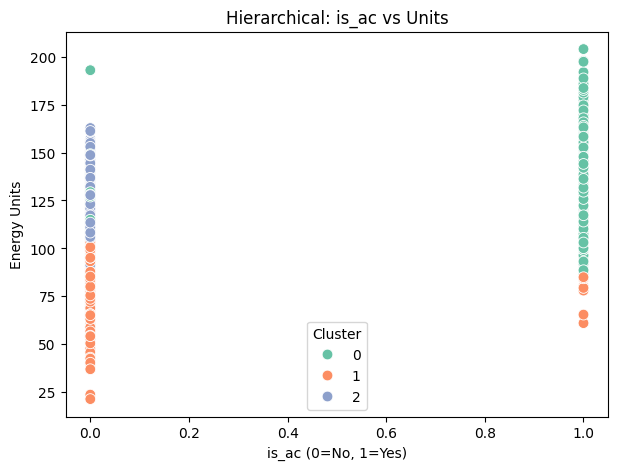

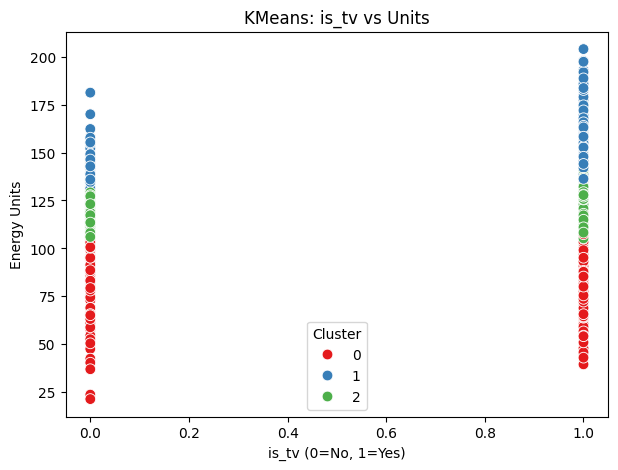

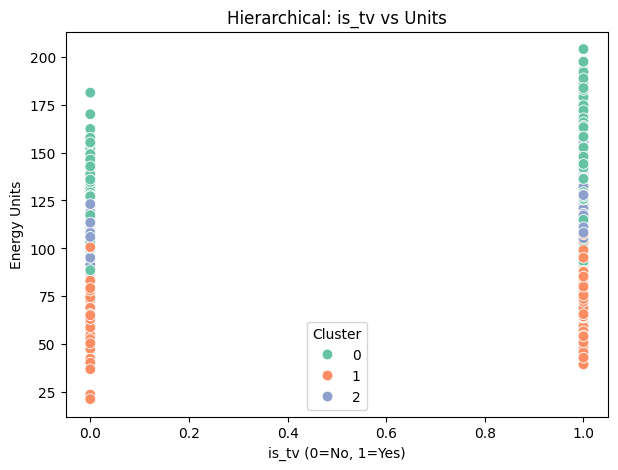

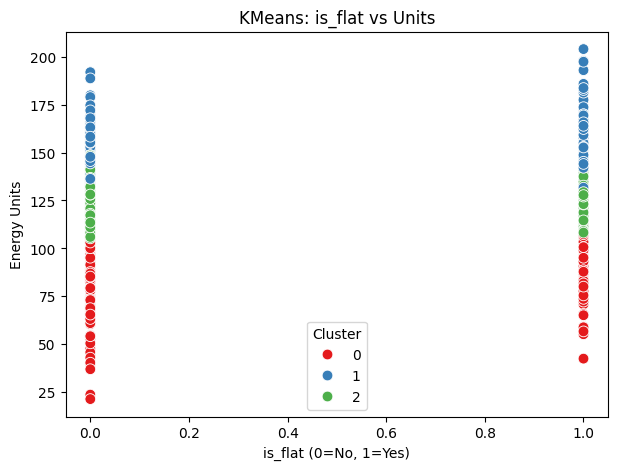

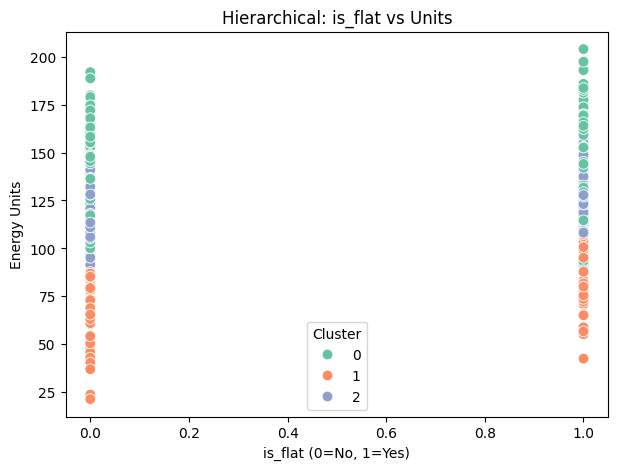

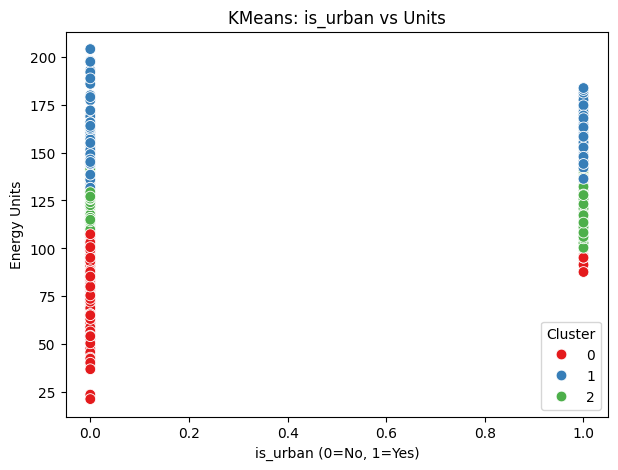

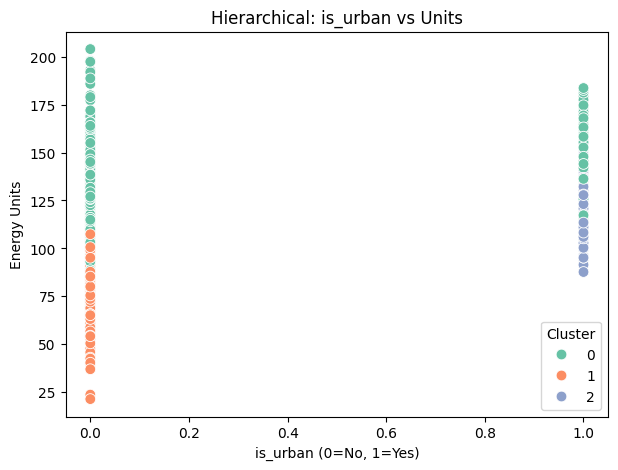

In [894]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# ---------------- Step 1: Load dataset ----------------
data = pd.read_csv("Household energy unit data.csv")

# ---------------- Step 2: Feature separation ----------------
binary_features = ["is_ac", "is_tv", "is_flat", "is_urban"]
cont_features = ["units"]   # extend this if you have 'housearea', 'num_rooms', etc.

X_bin = data[binary_features]                # keep binary as is
scaler = StandardScaler()
X_cont = scaler.fit_transform(data[cont_features])  # scale continuous

# Combine binary + scaled continuous
X_scaled = np.hstack((X_bin.values, X_cont))

# ---------------- Step 3: Find optimal number of clusters (KMeans) ----------------
print("\n🔎 Cluster evaluation for KMeans")
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    print(f"\nKMeans with {k} clusters:")
    print("Silhouette:", round(silhouette_score(X_scaled, labels), 3))
    print("Davies-Bouldin:", round(davies_bouldin_score(X_scaled, labels), 3))

# ---------------- Step 4: Choose final KMeans ----------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # change n_clusters after seeing results
kmeans_labels = kmeans.fit_predict(X_scaled)
data["KMeans_Cluster"] = kmeans_labels

print("\n🔹 Final KMeans Metrics:")
print("Inertia:", kmeans.inertia_)
print("Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, kmeans_labels))

# ---------------- Step 5: Hierarchical Clustering ----------------
hier = AgglomerativeClustering(n_clusters=3, linkage="ward")  # adjust clusters after eval
hier_labels = hier.fit_predict(X_scaled)
data["Hier_Cluster"] = hier_labels

print("\n🔹 Hierarchical Metrics:")
print("Silhouette Score:", silhouette_score(X_scaled, hier_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, hier_labels))

# ---------------- Step 6: Cluster Profiles ----------------
print("\n🔹 KMeans Cluster Profiles:")
print(data.groupby("KMeans_Cluster")[binary_features + cont_features].mean())

print("\n🔹 Hierarchical Cluster Profiles:")
print(data.groupby("Hier_Cluster")[binary_features + cont_features].mean())

# ---------------- Step 7: Visualizations ----------------
features = binary_features  # only binary vs units plots

for feature in features:
    # KMeans scatter
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=data[feature], y=data["units"], hue=data["KMeans_Cluster"],
                    palette="Set1", s=60)
    plt.title(f"KMeans: {feature} vs Units")
    plt.xlabel(f"{feature} (0=No, 1=Yes)")
    plt.ylabel("Energy Units")
    plt.legend(title="Cluster")
    plt.show()

    # Hierarchical scatter
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=data[feature], y=data["units"], hue=data["Hier_Cluster"],
                    palette="Set2", s=60)
    plt.title(f"Hierarchical: {feature} vs Units")
    plt.xlabel(f"{feature} (0=No, 1=Yes)")
    plt.ylabel("Energy Units")
    plt.legend(title="Cluster")
    plt.show()


🔹 KMeans Metrics:
Inertia: 2950.1561497602634
Silhouette Score: 0.30767030574971704
Davies-Bouldin Index: 1.379205495788659

🔹 Hierarchical Metrics:
Silhouette Score: 0.3126172728787132
Davies-Bouldin Index: 1.4051455870324479

🔹 KMeans Cluster Profiles:
                     units     is_ac     is_tv   is_flat  is_urban
KMeans_Cluster                                                    
0               144.041583  0.997093  0.813953  0.494186  0.627907
1               125.499638  0.000000  0.811224  0.464286  1.000000
2                94.132780  0.125000  0.757576  0.473485  0.000000

🔹 Hierarchical Cluster Profiles:
                   units     is_ac  is_tv   is_flat  is_urban
Hier_Cluster                                                 
0             117.023699  0.000000    1.0  0.472837  0.639839
1             112.371953  0.376238    0.0  0.504950  0.574257
2             141.984397  0.996678    1.0  0.465116  0.578073


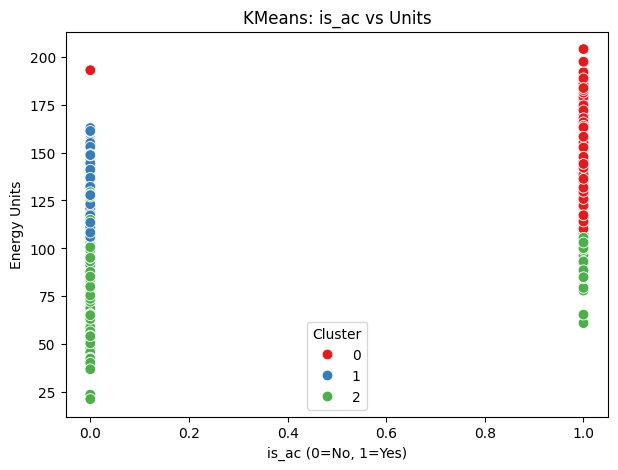

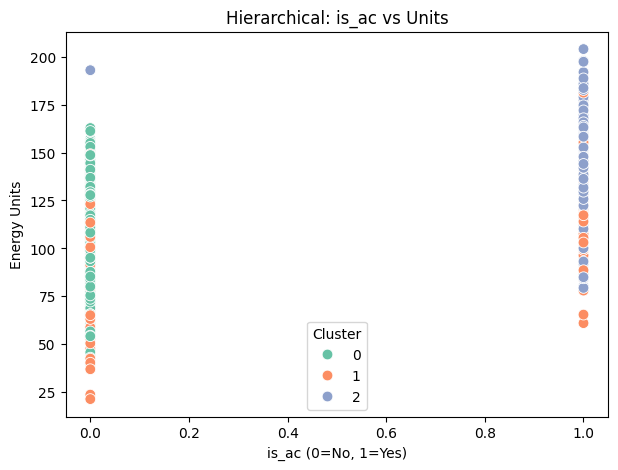

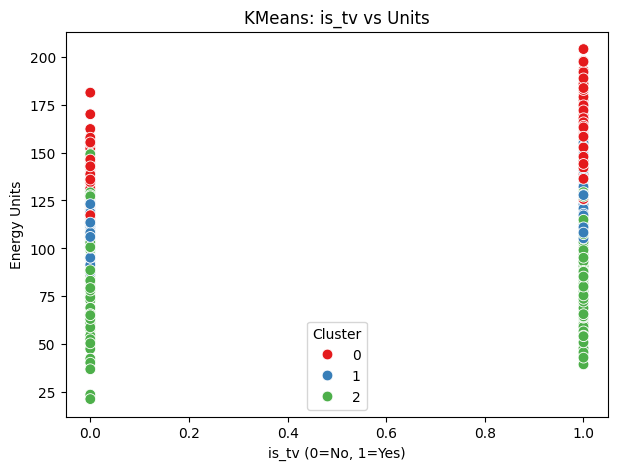

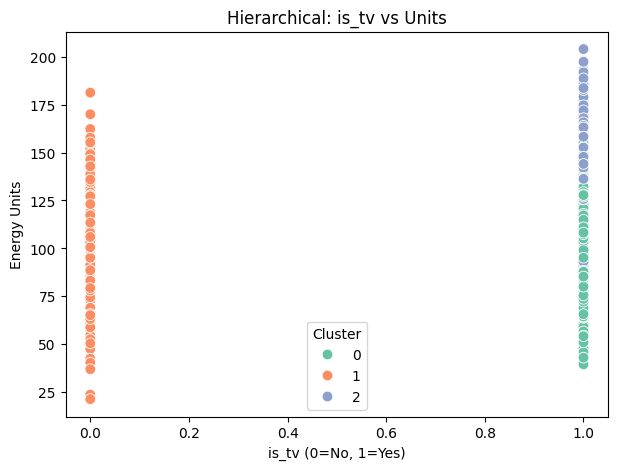

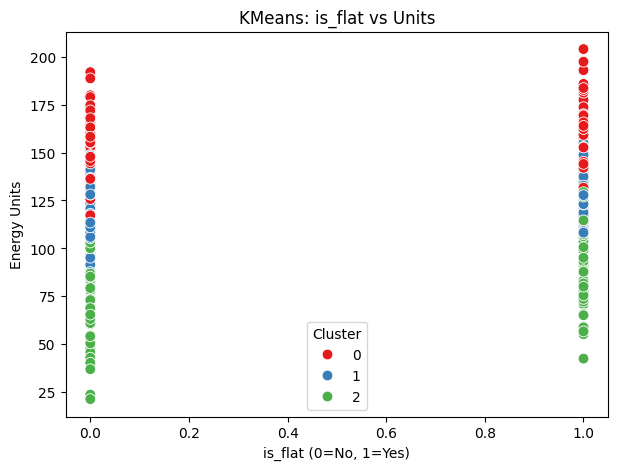

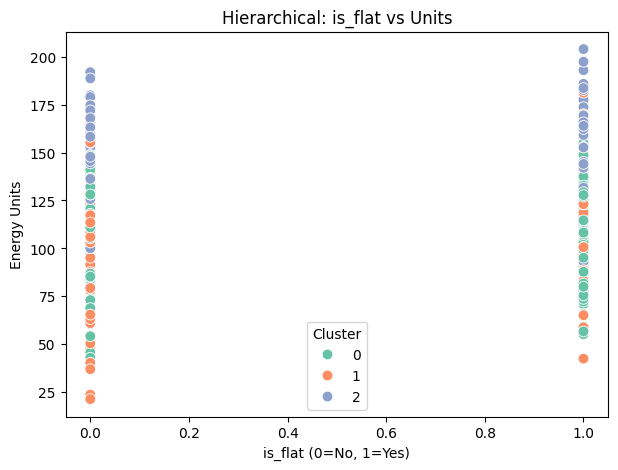

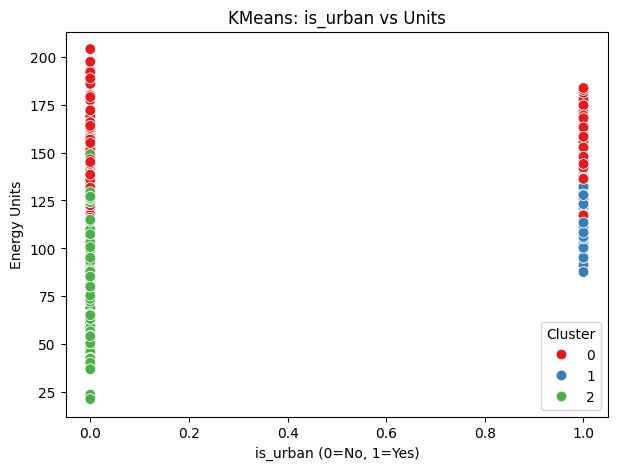

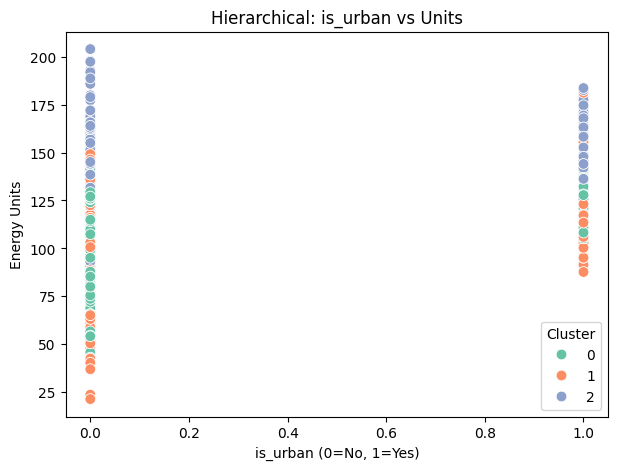

In [895]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# ---------------- Step 1: Load dataset ----------------
data = pd.read_csv("Household energy unit data.csv")

# Features: Appliance ownership + Units
X = data[["is_ac", "is_tv", "is_flat", "is_urban", "units"]]

# ---------------- Step 2: Scale features ----------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------- Step 3: KMeans Clustering ----------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
data["KMeans_Cluster"] = kmeans_labels

# Metrics
print("🔹 KMeans Metrics:")
print("Inertia:", kmeans.inertia_)
print("Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, kmeans_labels))

# ---------------- Step 4: Hierarchical Clustering ----------------
hier = AgglomerativeClustering(n_clusters=3, linkage="ward")
hier_labels = hier.fit_predict(X_scaled)
data["Hier_Cluster"] = hier_labels

# Metrics
print("\n🔹 Hierarchical Metrics:")
print("Silhouette Score:", silhouette_score(X_scaled, hier_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, hier_labels))

# ---------------- Step 5: Cluster Profiles ----------------
print("\n🔹 KMeans Cluster Profiles:")
print(data.groupby("KMeans_Cluster")[["units","is_ac","is_tv","is_flat","is_urban"]].mean())

print("\n🔹 Hierarchical Cluster Profiles:")
print(data.groupby("Hier_Cluster")[["units","is_ac","is_tv","is_flat","is_urban"]].mean())

# ---------------- Step 6: Visualizations ----------------
features = ["is_ac", "is_tv", "is_flat", "is_urban"]

for feature in features:
    # KMeans scatter
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=data[feature], y=data["units"], hue=data["KMeans_Cluster"], palette="Set1", s=60)
    plt.title(f"KMeans: {feature} vs Units")
    plt.xlabel(f"{feature} (0=No, 1=Yes)")
    plt.ylabel("Energy Units")
    plt.legend(title="Cluster")
    plt.show()

    # Hierarchical scatter
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=data[feature], y=data["units"], hue=data["Hier_Cluster"], palette="Set2", s=60)
    plt.title(f"Hierarchical: {feature} vs Units")
    plt.xlabel(f"{feature} (0=No, 1=Yes)")
    plt.ylabel("Energy Units")
    plt.legend(title="Cluster")
    plt.show()


In [896]:
# from scipy.cluster.hierarchy import dendrogram, linkage
# plt.figure(figsize=(10, 6))
# linkage_matrix = linkage(X_scaled, method="ward")
# dendrogram(linkage_matrix, truncate_mode="level", p=5, color_threshold=15)
# plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
# plt.xlabel("Households")
# plt.ylabel("Distance")
# plt.show()

In [897]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# ---------- Step 1: Load dataset ----------
data = pd.read_csv("/content/Household energy unit data.csv")

# ---------- Step 2: Feature Engineering ----------
data['Total_Energy_kWh'] = data['units']
data['Energy_per_Person'] = data['units'] / data['num_people'].replace(0, 1) # Handle division by zero
data['Energy_per_SqM'] = data['units'] / data['housearea'].replace(0, 1e-6) # Handle division by zero

# ---------- Step 3: Base features ----------
binary_features = ["is_ac", "is_tv", "is_flat", "is_urban"]
numeric_features = ["Energy_per_Person", "Energy_per_SqM", "Total_Energy_kWh"]

# ---------- Step 4: Feature augmentation ----------
data["Energy_Density"] = data["Total_Energy_kWh"] / (data["Energy_per_SqM"] + 1e-6)
data["Energy_Use_Efficiency"] = data["Energy_per_Person"] / (data["Total_Energy_kWh"] + 1e-6)
data["Appliance_Index"] = data["is_ac"] + data["is_tv"] + data["is_flat"]

# Combine all features
features = binary_features + numeric_features + ["Energy_Density", "Energy_Use_Efficiency", "Appliance_Index"]
X = data[features]

# ---------- Step 5: Scaling only numeric features ----------
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_features + ["Energy_Density", "Energy_Use_Efficiency"]] = scaler.fit_transform(
    X[numeric_features + ["Energy_Density", "Energy_Use_Efficiency"]]
)

# ---------- Step 6: Apply KMeans ----------
kmeans = KMeans(n_clusters=3, random_state=42)
data["Cluster_KMeans"] = kmeans.fit_predict(X_scaled)
print("Silhouette Score (KMeans):", silhouette_score(X_scaled, data["Cluster_KMeans"]))

# ---------- Step 7: Apply Hierarchical ----------
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
data["Cluster_Hierarchical"] = hc.fit_predict(X_scaled)
print("Silhouette Score (Hierarchical):", silhouette_score(X_scaled, data["Cluster_Hierarchical"]))

# ---------- Step 8: Visualization ----------
sns.scatterplot(
    data=data, x="Appliance_Index", y="Energy_per_Person",
    hue="Cluster_KMeans", palette="Set2"
)
plt.title("KMeans Clustering: Appliance Index vs Energy per Person")
plt.xlabel("Appliance Index (Sum of owned appliances)")
plt.ylabel("Energy per Person (Standardized)")
plt.show()

sns.scatterplot(
    data=data, x="is_urban", y="Total_Energy_kWh",
    hue="Cluster_Hierarchical", palette="Set1"
)
plt.title("Hierarchical Clustering: Urban vs Total Energy")
plt.xlabel("is_urban (0=No, 1=Yes)")
plt.ylabel("Total Energy (kWh)")
plt.show()

# ---------- Step 9: Cluster Summary ----------
cluster_summary = data.groupby("Cluster_KMeans")[features].mean()
print("\nCluster Summary (KMeans):\n", cluster_summary)

FileNotFoundError: [Errno 2] No such file or directory: '/content/Household energy unit data.csv'